In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Boosting

"Boosting" is an ensemble learning algorithms which combines several weak learners to form a strong learner. 

A weak learner is that which does only slightly better than a random guessing. An example of weak learner: Decision Stump (CART algorithm whose maximum depth is 1). 

Unlike many ML models which focus on high quality prediction done by a single model, boosting algorithms seek to improve the prediction power by training a sequence of weak models, each compensating the weaknesses of its predecessors.

# Working of Boosting Algorithms

Step 1: The base learner takes all the distributions and assign equal weight or attention to each observation. 

Step 2: If there is any prediction error caused by first base learning algorithm, then we pay higher attention to observations having prediction error. Then, we apply the next base learning algorithm.

Step 3: Iterate Step 2 till the limit of base learning algorithm is reached or higher accuracy is achieved.

Finally, it combines the outputs from weak learner and creates a strong learner which eventually improves the prediction power of the model. <b> Note: Boosting pays higher focus on examples which are mis-classified or have higher errors by preceding weak rules.</b>

# Types of Boosting Algorithms

The underlying engine used for Boosting Algorithms can be anything. It can be a decision stamp, marign-maximizing classification algorithm, etc. There are many boosting algorithms which use other types of engine such as:
- AdaBoost (Adaptive Boosting)
- Gradient Tree Boosting
- XGBoost

## AdaBoost

<b>AdaBoost</b> stands for <b>Adaptive Boosting</b>. In this boosting method, each predictor pays more attention to the instances wrongly predicted by its predecessor. 

It fits a sequence of weak learners on differente weighted training data. It starts by predicting original data set and gives equal weight to each observation. If prediction is incorrect using the first learner, then it gives higher weight to observation which have been predicted incorrectly. Being an iterative process, it continues to add learner(s) until a limit is reached in the number of models or accuracy. 

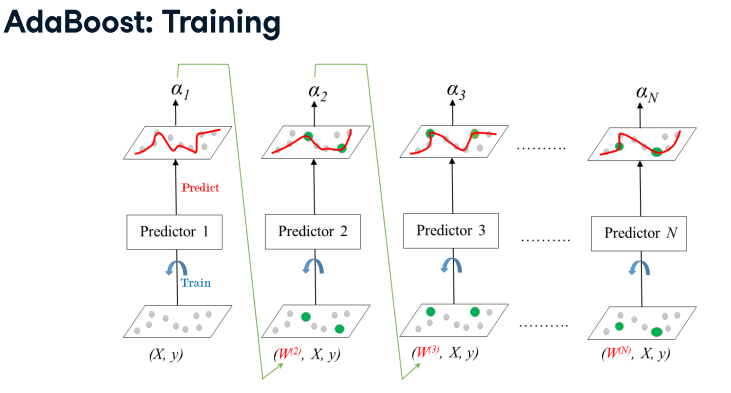

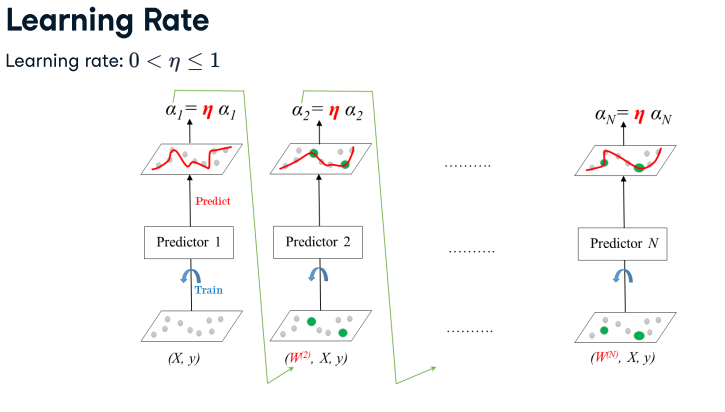

It can be used for Classification or Regressino Problems:
- In Classification:
    - Weighted Majority Voting
    - In Sklearn: AdaBoostClassifier
    
- In Regression:
    - Weighted Average
    - In Sklearn: AdaBoostRegressor

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [7]:
X = cancer.data

In [9]:
y = cancer.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                   stratify=y, 
                                                   random_state = 42)

In [11]:
X.shape

(569, 30)

In [12]:
X_train.shape

(398, 30)

In [13]:
X_test.shape

(171, 30)

In [21]:
np.unique(y)

array([0, 1])

In [14]:
#Insantiating a weak decision tree with max-depth =1 
dt = DecisionTreeClassifier(max_depth=1, random_state=42)

In [15]:
#Instantitate an AdaBoost Classifier 'adaboost_clf'
adaboost_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)

Here, the boosting is terminated at 100 estimators.

In [16]:
adaboost_clf.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=42),
                   n_estimators=100)

In [22]:
#Predict the test set probabilites of positive class
y_pred_proba = adaboost_clf.predict_proba(X_test)[:,1]

In [24]:
#Evaluating the test-set roc_auc_score
adaboost_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {adaboost_clf_roc_auc_score}')

ROC AUC Score: 0.9883177570093458


In [25]:
from sklearn.metrics import roc_curve

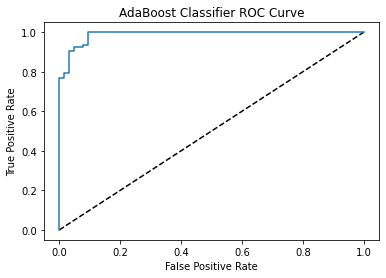

In [26]:
fpr, tpr, thersholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='AdaBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier ROC Curve')
plt.show()

We can tune the parameters to optimize the performance of algorithms:-
- n_estimators: It controls the number of weak learners.
- learning_rate: It controls the contribution of weak learners in the final combination. There is a trade-off between <b>learning_rate</b> and <b>n_estimators</b>
- base_estimators: It helps to specify different ML algorithm

# Gradient Boosting

Gradient Boosting appraoches the problem a bit differently. Instead of adusting weights of data points, Gradient Boosting Focuses on the difference between the prediciton and the ground truth. Therefore, it does not tweak the weights of training instances but it fits each predictor using its predecessor's residuals error as labels.

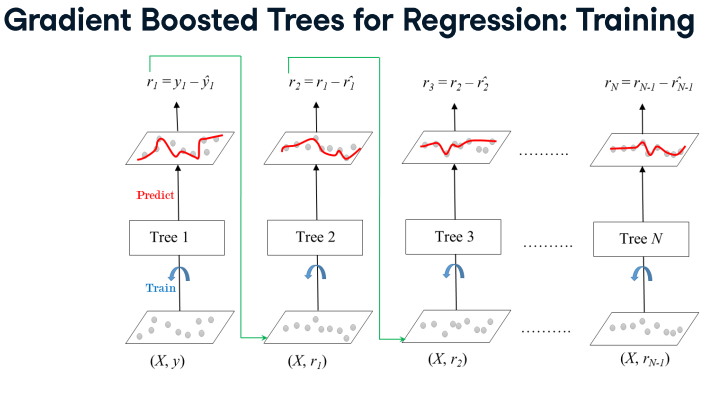

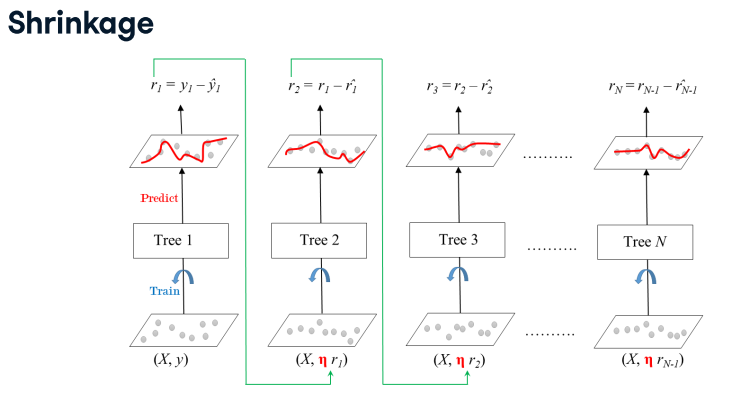

Each new model gradually minimizes the loss function (y = ax + b + e, e needs special attention as it is an error term) of the whole system using Gradient Descent method. The learning procedure consecutively fit new models to provide a more accurate estimate of the response variable.

The principle idea behind this algorithm is to construct new base learners which can be maximally correlated with negative gradient of the loss function, associated with the whole ensemble. 

<b>Note: Gradient Boosting uses Decision Trees as its base estimator </b>

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                   stratify=y, 
                                                   random_state = 42)

In [29]:
#Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)

In [30]:
gbt.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=300, random_state=42)

In [31]:
y_pred = gbt.predict(X_test)

In [32]:
y_pred

array([ 0.31735201,  0.89605505,  0.93861243,  0.00417678,  0.66347333,
        0.03579708,  0.9967925 , -0.03234498,  1.00317032,  0.06019978,
        1.11089609,  0.93350997, -0.14443314,  0.69097152,  0.94315805,
        0.57990311, -0.01146914,  0.45049199,  0.85109483,  0.6735698 ,
        0.96714067,  0.88688006,  0.95473442, -0.15483931, -0.0228787 ,
        0.94077011,  0.96351229,  0.72657773, -0.00120491,  0.00538293,
        0.89834992, -0.02222361,  0.94461599,  1.03530549, -0.02776907,
        1.06663729,  0.4596622 ,  1.00416063,  0.99179561,  0.96740335,
        0.83559488,  0.2604622 ,  1.01842564,  1.06393771,  1.04129544,
        0.79080709,  0.48805282,  1.04605774,  0.99874867,  0.09456131,
        0.9611688 ,  0.89820299, -0.05422592, -0.03077313,  0.94835841,
        0.93966208,  0.0098797 ,  0.96242236,  0.93809402,  0.80679743,
       -0.11998633,  0.02623653,  0.03816837,  1.04427123,  0.93523484,
        0.99109045,  0.8941737 ,  0.21125705,  1.04913163,  0.95

In [33]:
rmse_test= MSE(y_test, y_pred)**(1/2)

In [34]:
rmse_test

0.21694398165777604

In [35]:
print(f'Test set RMSE: {rmse_test}')

Test set RMSE: 0.21694398165777604


# Cons of Gradient Boosting

- GradientBoosting involves an exhaustive search procedure
- Each decision tree is trained to find the best split points and features.
- May lead to decision trees using the same split points and maybe the same features.

# Stochastic Gradient Boosting

- Each tree is trained on a random subset of rows of the training data.
- The samples instances (40%-80% of the training set) are sampled without replacement.
- Features are sampled (without replacement) when choosing split points.
- Result: further ensemble diversity. 
- Effect: adding furhter variance to the ensemble of treees

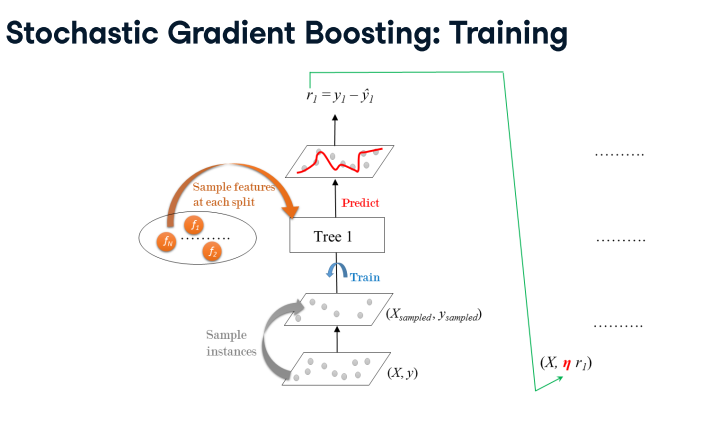

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3, 
                                                   random_state=42)

- max_depth: Maximum depth of the inidvidual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables

- subsample: The fraction of samples to be used for fitting the individual base learners. If smalller than 1.0 this results in Stochastic Gradient Boosting. sumbsample interacts with the parameters n_estimators. Choosing subsample <1.0 leads to a reduction of variance and an increase in bias.

- max_features: The number of features to consider when looking for the best split:

In [38]:
sgbt = GradientBoostingRegressor(max_depth=1,
                                subsample=0.8,
                                max_features=0.2,
                                n_estimators=300,
                                random_state=42)

In [39]:
sgbt.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, max_features=0.2, n_estimators=300,
                          random_state=42, subsample=0.8)

In [40]:
y_pred = sgbt.predict(X_test)

In [41]:
rmse_test = MSE(y_test, y_pred)**(1/2)

In [42]:
print(f'Test set RMSE: {rmse_test}')

Test set RMSE: 0.1924248072072031
